# Bandit Problem

In [1]:
# imports
from bandits import Bandit
import random
# Include your imports here, if any are used. 
import numpy as np
import matplotlib.pyplot as plt

A list of ten bandit objects initialized in the list...

In [2]:
bandits = [Bandit(random.random()*4-2) for _ in range(10)]

In [3]:
bandits[0].pullLever()

0.013447582513793743

## Greedy algorithm Implementation

In [4]:
def run_greedy():
    # TODO: Implement the greedy algorithm here
    # Return the reward from the bandits in a list
    estimated_value = np.zeros(10)
    number_of_pulls = np.zeros(10)
    rewards = []
    
    for _ in range(2000):
        best_items = np.where(estimated_value == np.max(estimated_value))[0]
        max_item = random.choice(best_items)
        reward = bandits[max_item].pullLever()
        rewards.append(reward)
        number_of_pulls[max_item] += 1
        estimated_value[max_item] += (reward - estimated_value[max_item]) / number_of_pulls[max_item]

    return rewards

Plot the cumulative average of rewards as the number of iterations increases.

In [5]:
rewards = run_greedy()
running_sum = 0
avg_rewards = [(running_sum := running_sum + r) / (i + 1) for i, r in enumerate(rewards) if not (running_sum := 0)]

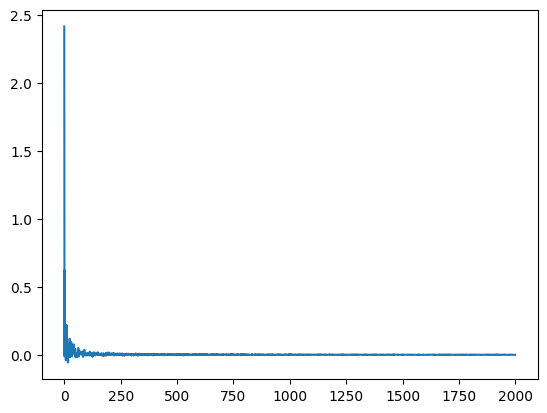

In [6]:
plt.plot(avg_rewards)
plt.show()

## $\epsilon$-greedy Algorithm

In [7]:
def run_epsilon_greedy(epsilon):
    # TODO: Implement the epsilon greedy algorithm here
    # Return the reward from the bandits in a list
    estimated_value = np.zeros(10)
    number_of_pulls = np.zeros(10)
    items = [i for i in range(10)]
    rewards = []
    
    for _ in range(2000):
        best_items = np.where(estimated_value == np.max(estimated_value))[0]
        max_item = random.choice(best_items)
        max_item = random.choice(items) if np.random.rand() <= epsilon else max_item
        reward = bandits[max_item].pullLever()
        rewards.append(reward)
        number_of_pulls[max_item] += 1
        estimated_value[max_item] += (reward - estimated_value[max_item]) / number_of_pulls[max_item]
    return rewards

Plot the cumulative average of rewards as the number of iterations increases but for various values of $\epsilon$.

In [8]:
rewards = run_epsilon_greedy(0.02)
running_sum = 0
avg_rewards = [(running_sum := running_sum + r) / (i + 1) for i, r in enumerate(rewards) if not (running_sum := 0)]

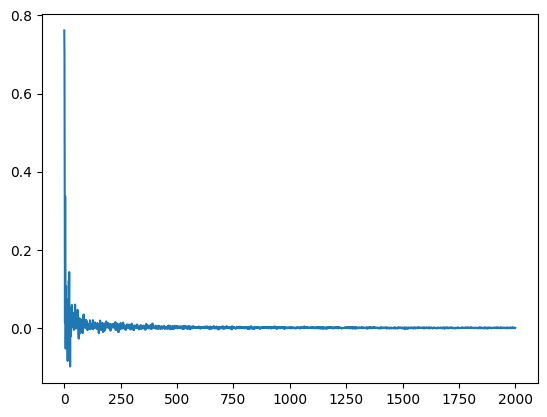

In [9]:
plt.plot(avg_rewards)
plt.show()

## Finding the optimal $\epsilon$

Run the $\epsilon$-greedy algorithm for 1000 iterations and find the optimal $\epsilon$ value by plotting the cumulative average of rewards for various values of $\epsilon$

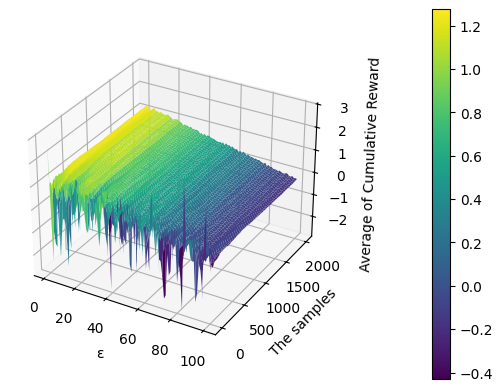

In [10]:
import numpy as np
import matplotlib.pyplot as plt

epsilon_vs_avg_rewards = []
for epsilon in np.linspace(0, 1, 100):
    rewards = run_epsilon_greedy(epsilon)
    running_sum = 0
    avg_rewards = [(running_sum := running_sum + r) / (i + 1) for i, r in enumerate(rewards)]
    epsilon_vs_avg_rewards.append(avg_rewards)

epsilon_vs_avg_rewards = np.array(epsilon_vs_avg_rewards)

X = np.linspace(1, 100, 100)  
Y = np.linspace(1, 2000, 2000) 
X, Y = np.meshgrid(X, Y)  

epsilon_indices = np.linspace(0, 1, 100)  
z = np.array([epsilon_vs_avg_rewards[int(i), :] for i in np.linspace(0, 99, 100)])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, z.T, cmap='viridis') 

cbar = fig.colorbar(surf, pad=0.2)

ax.set_xlabel('\u03b5')
ax.set_ylabel('The samples')
ax.set_zlabel('Average of Cumulative Reward')

plt.show()


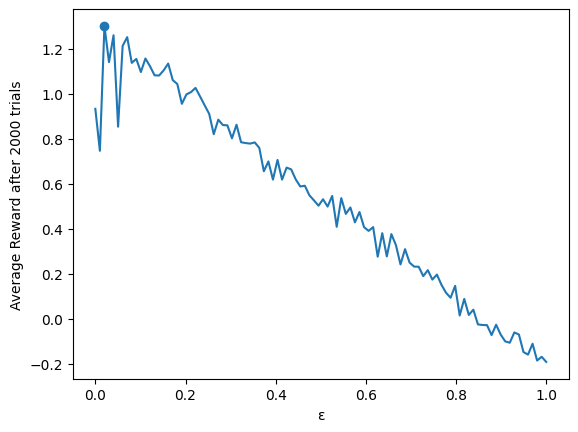

The maximum occurs at ε = 0.02


In [11]:
opt = epsilon_vs_avg_rewards[:, 1999]

plt.figure(100)
plt.plot(epsilon_indices, opt)
plt.scatter([np.argmax(opt)*0.01], opt[np.argmax(opt)])
plt.ylabel('Average Reward after 2000 trials')
plt.xlabel('\u03b5')
plt.show()
print(f'The maximum occurs at \u03b5 = {np.argmax(opt)*0.01}')

## Optimistic Initial Values

In [12]:
def run_optimistic_greedy():
    # TODO: Implement the optimistic greedy algorithm here
    # Return the reward from the bandits in a list
    estimated_value = np.zeros(10) + 10
    number_of_pulls = np.zeros(10)
    rewards = []
    
    for _ in range(2000):
        best_items = np.where(estimated_value == np.max(estimated_value))[0]
        max_item = random.choice(best_items)
        reward = bandits[max_item].pullLever()
        rewards.append(reward)
        number_of_pulls[max_item] += 1
        estimated_value[max_item] += (reward - estimated_value[max_item]) / number_of_pulls[max_item]

    return rewards

Plot the cumulative average of rewards as the number of iterations increases for an optimistic greedy of $Q_1 = 10$ and a non-optimistic $\epsilon = 0.1$

In [13]:
optimistic_rewards = run_optimistic_greedy()
running_sum = 0
avg_optimistic_rewards = [(running_sum := running_sum + r) / (i + 1) for i, r in enumerate(optimistic_rewards) if not (running_sum := 0)]
epsilon_rewards = run_epsilon_greedy(0.1)
running_sum = 0
avg_epsilon_rewards = [(running_sum := running_sum + r) / (i + 1) for i, r in enumerate(epsilon_rewards) if not (running_sum := 0)]

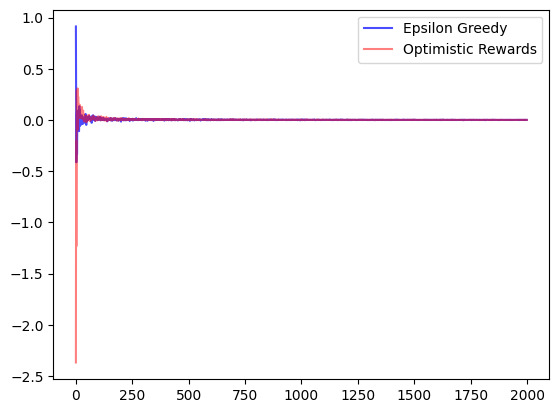

In [14]:
plt.plot(avg_epsilon_rewards, color='blue', alpha=0.7, label='Epsilon Greedy')
plt.plot(avg_optimistic_rewards, color='red', alpha=0.5, label='Optimistic Rewards')
plt.legend()
plt.show()

## Optional - Upper Confidence Bound (UCB)

In [15]:
def run_ucb(c):
    # TODO: Implement the UCB algorithm here
    # Return the reward from the bandits in a list
    pass